In [2]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder 
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [3]:
datos = pd.read_csv('./Mall_Customers.csv')

In [4]:
datos.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
print(datos['Gender'].unique())

['Male' 'Female']


In [7]:
#Inicialmente se valida que los dos únicos generos sean Male y Female y se actualizan con codificación Binaria. Male=1 Female=0
datos['Gender'] = datos['Gender'].map({'Male': 1, 'Female': 0})

In [8]:
datos.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [9]:
datos.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de valores atípicos con Annual_Income')

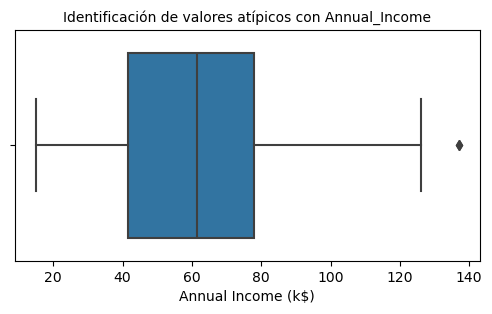

In [12]:
#identificacion de valores faltantes

plt.figure(figsize=(6,3))
sns.boxplot(x=datos['Annual Income (k$)'])
plt.title('Identificación de valores atípicos con Annual_Income', fontsize=10)

Text(0.5, 1.0, 'Identificación de valores atípicos con Spending Score')

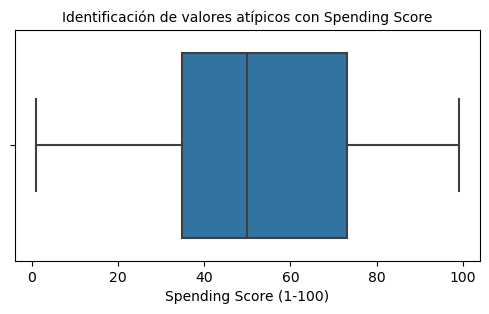

In [13]:

plt.figure(figsize=(6,3))
sns.boxplot(x=datos['Spending Score (1-100)'])
plt.title('Identificación de valores atípicos con Spending Score', fontsize=10)

Text(0.5, 1.0, 'Identificación de valores atípicos con Age')

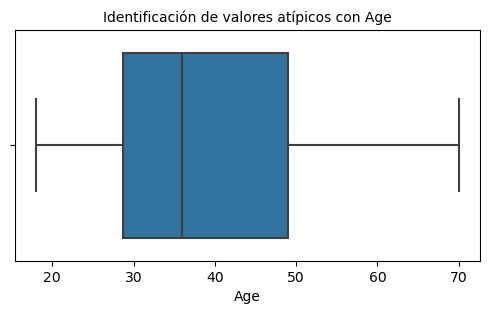

In [14]:
plt.figure(figsize=(6,3))
sns.boxplot(x=datos['Age'])
plt.title('Identificación de valores atípicos con Age', fontsize=10)

In [17]:
#Revisar datos faltantes

print("Cantidad con registros en cero: ", datos['Age'].isin([0]).sum())
print("Cantidad con registros en cero: ", datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad con registros en cero: ", datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad con registros en cero:  0
Cantidad con registros en cero:  0
Cantidad con registros en cero:  0


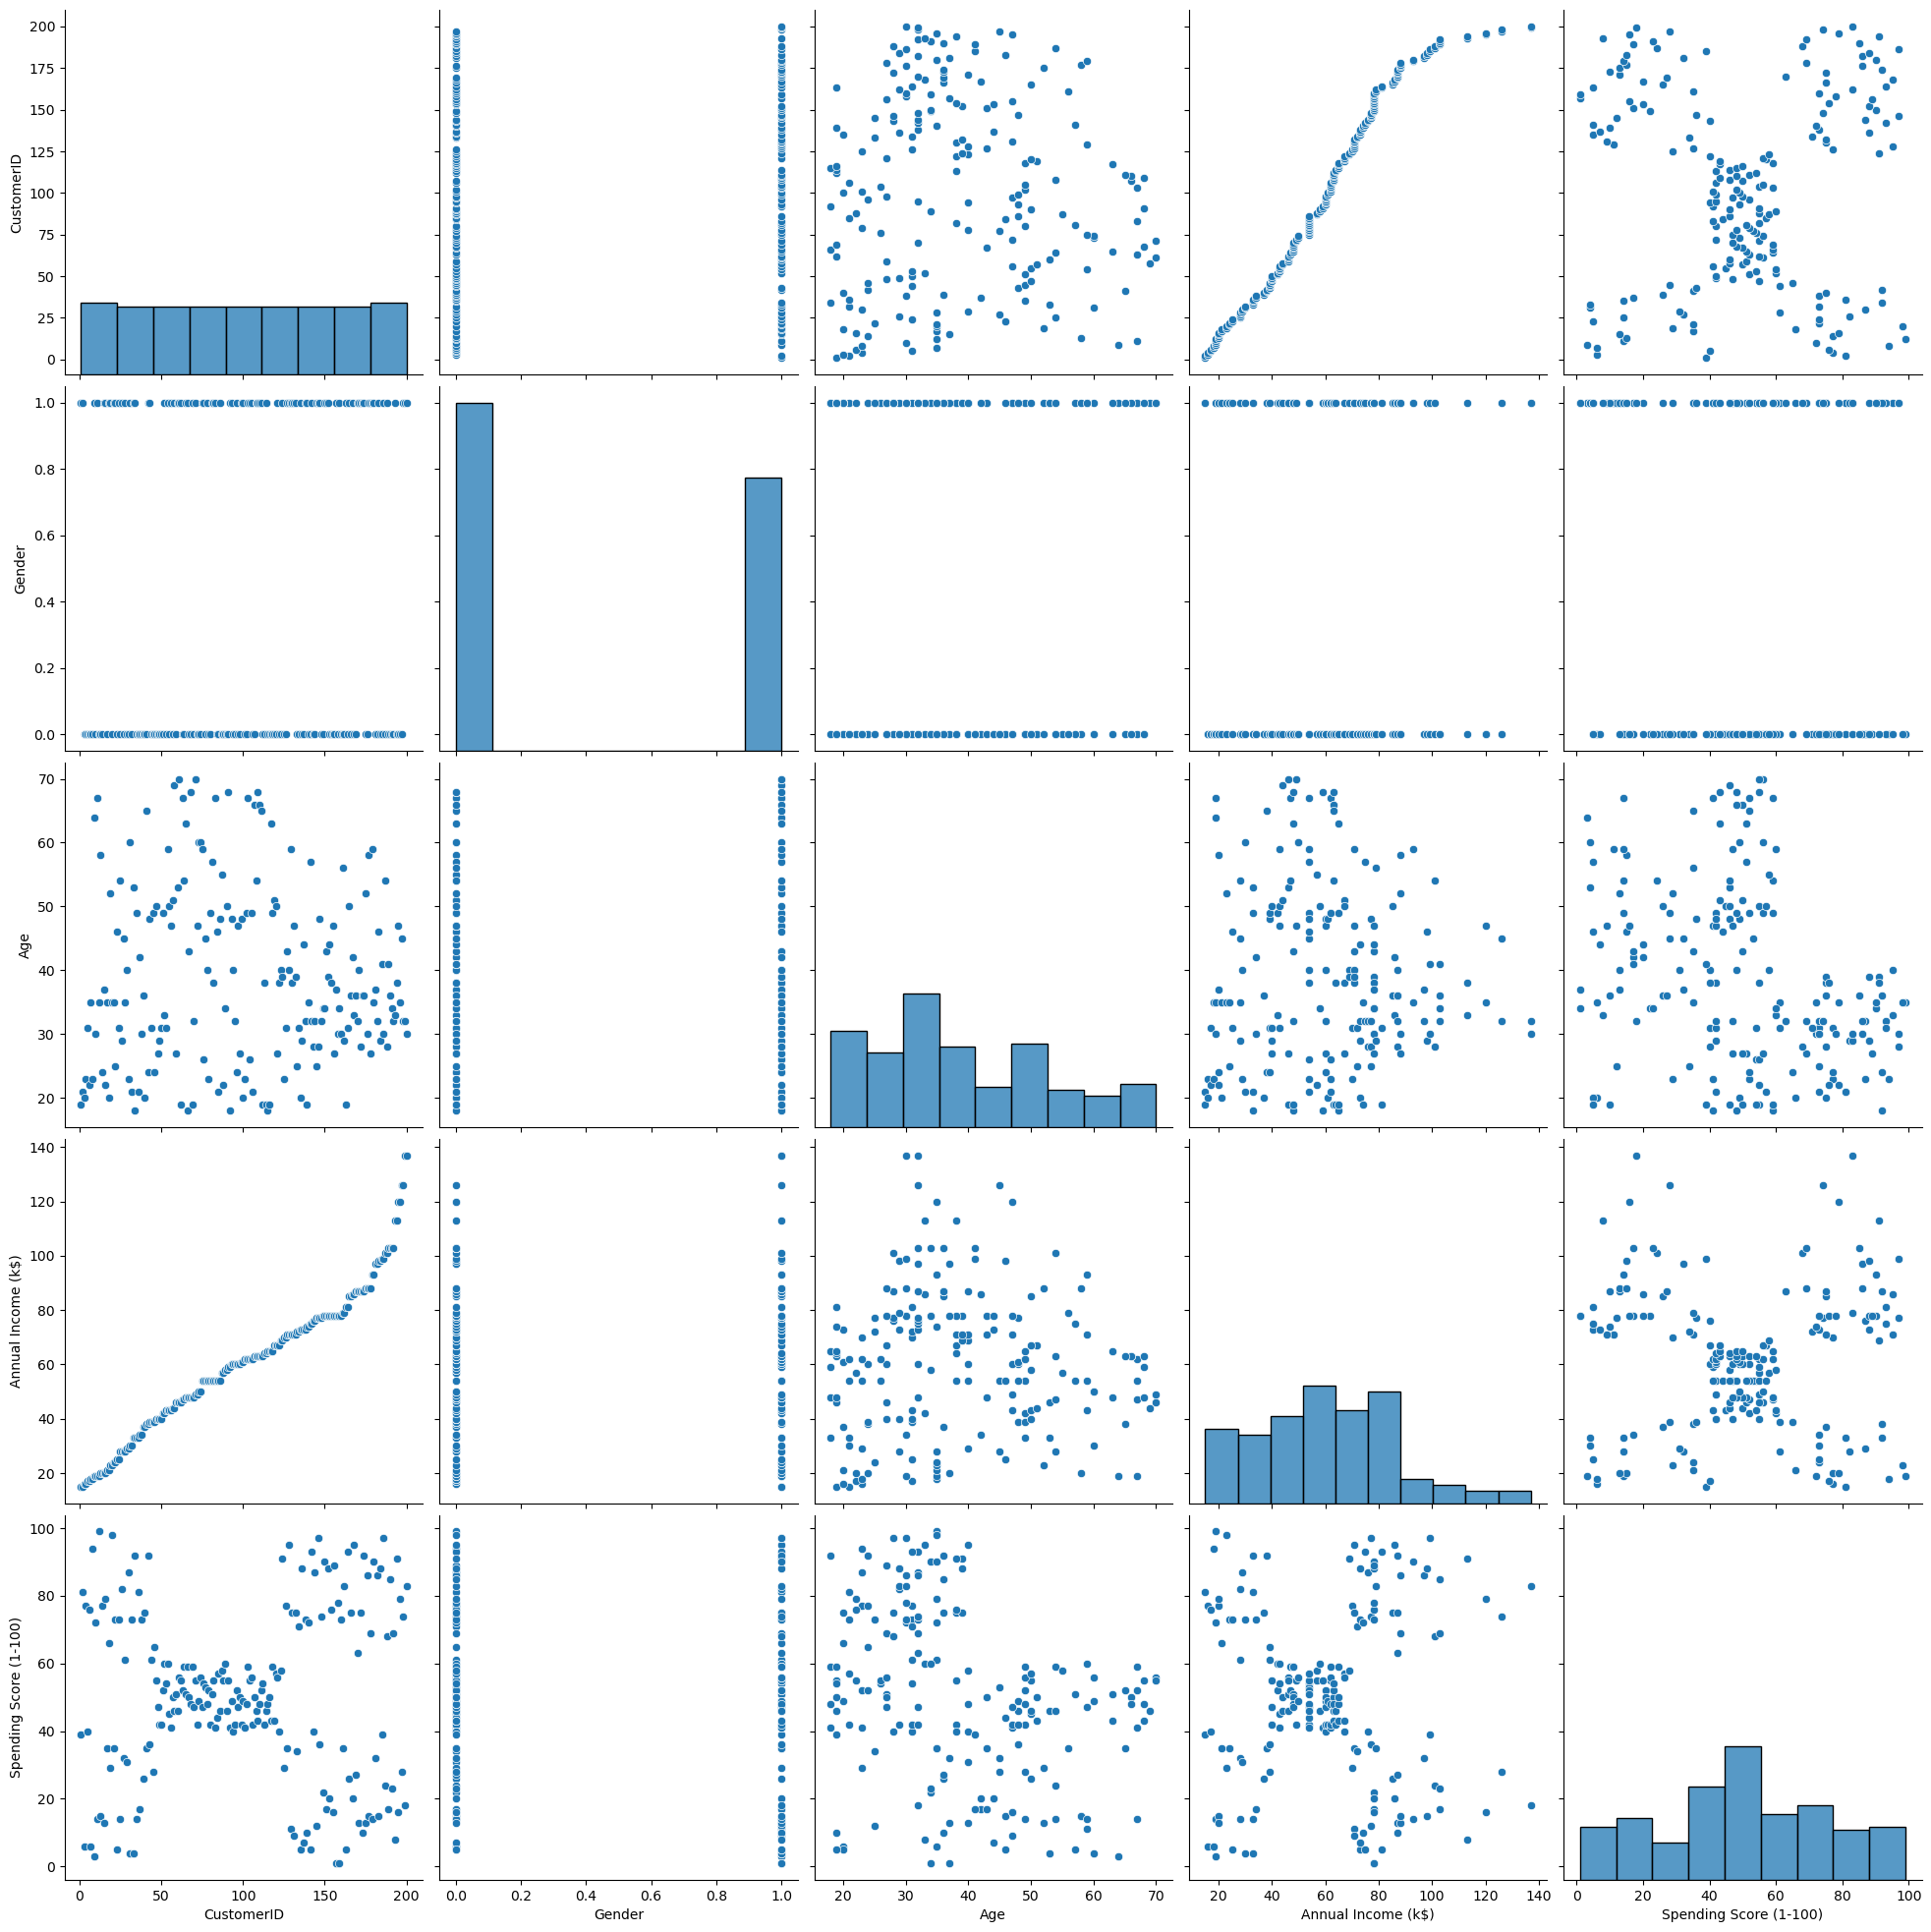

In [18]:
sns.pairplot(datos.dropna(), size=4,kind='scatter')

In [19]:
# Matriz de correlación
corr_matrix = datos.corr()
corr_matrix

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


In [21]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [67]:
#Seleccion de características más importantes
datos=datos[['Age','Annual Income (k$)','Gender']]

In [53]:
#Revisión de datos de las variables objetivo

datos.head()

,Age,Annual Income (k$),Gender
0,19,15,1
1,21,15,1
2,20,16,0
3,23,16,0
4,31,17,0


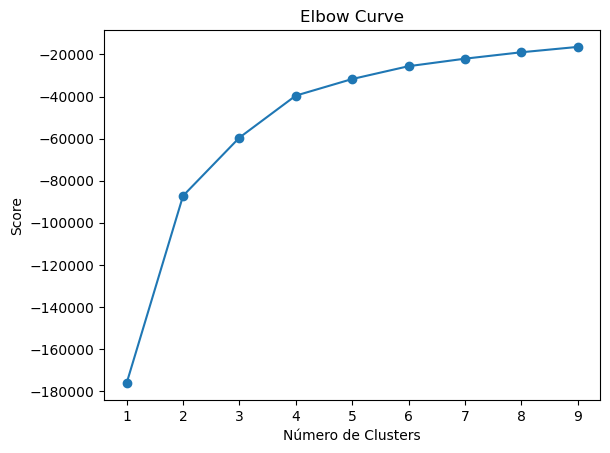

In [54]:
#Entrenar el modelo

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(datos).score(datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [55]:
#Generación del modelo de agrupamiento cocn K=6

Modelo = KMeans(n_clusters=6, random_state=0)
Modelo.fit(datos)

KMeans(n_clusters=6, random_state=0)

In [56]:
#Se agrega la columna Grupo a la BD para identificar el número de grupo del agrupamiento

Modelo.labels_
datos["Grupo"] = Modelo.labels_
print(datos)

     Age  Annual Income (k$)  Gender  Grupo
0     19                  15       1      1
1     21                  15       1      1
2     20                  16       0      1
3     23                  16       0      1
4     31                  17       0      1
..   ...                 ...     ...    ...
195   35                 120       0      0
196   45                 126       0      0
197   32                 126       1      0
198   32                 137       1      0
199   30                 137       1      0

[200 rows x 4 columns]


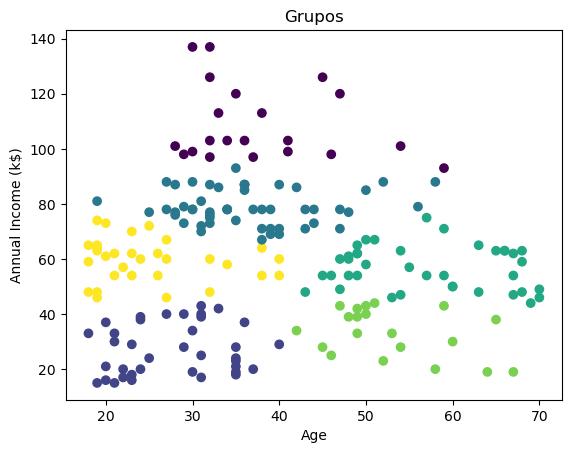

In [57]:
plt.scatter(datos['Age'], datos['Annual Income (k$)'], c=datos ['Grupo'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Grupos')
plt.show()



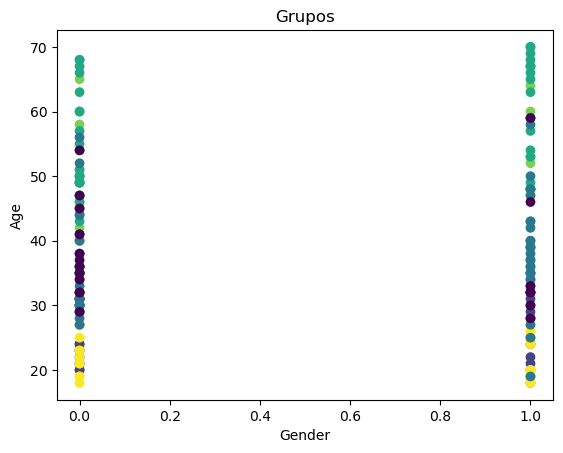

In [62]:
plt.scatter(datos['Gender'], datos['Age'], c=datos ['Grupo'], cmap='viridis')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Grupos')
plt.show()

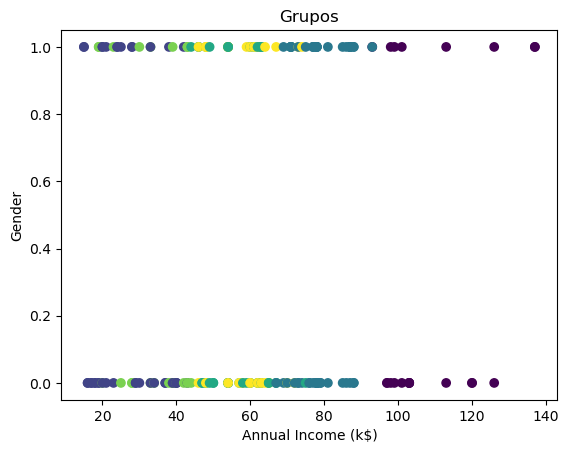

In [64]:
plt.scatter(datos['Annual Income (k$)'], datos['Gender'], c=datos ['Grupo'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Gender')
plt.title('Grupos')
plt.show()

In [ ]:
## Se diseñan los modelos de Clustering de agrupación con K-means con la base de datos del mall, se toman las variables género, edad y ingresos anuales.
## Una vez se realiza la gráfica del metodo de codo se identifica que para este ejercicio son necesarios utilizar 6 clusters
## Con los clusters identificados vemos en el gráfico de dispercion con las variables edad e ingresos anuales, los clusters estan tomando mayor importanca por los ingresos que por la edad.
## Los que están en un ingreso promedio de 60K están siendo categorizados por la edad como relevante.
## Se identifica que el grupo con menor participación son personas con mayor edad y bajos ingresos anuales.